In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [3]:
data=pd.read_csv(r"C:\Machine learning\Retail House Predictor\Bengaluru_House_Data.csv")

In [4]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
data=data.dropna()

In [7]:
data.shape

(7496, 9)

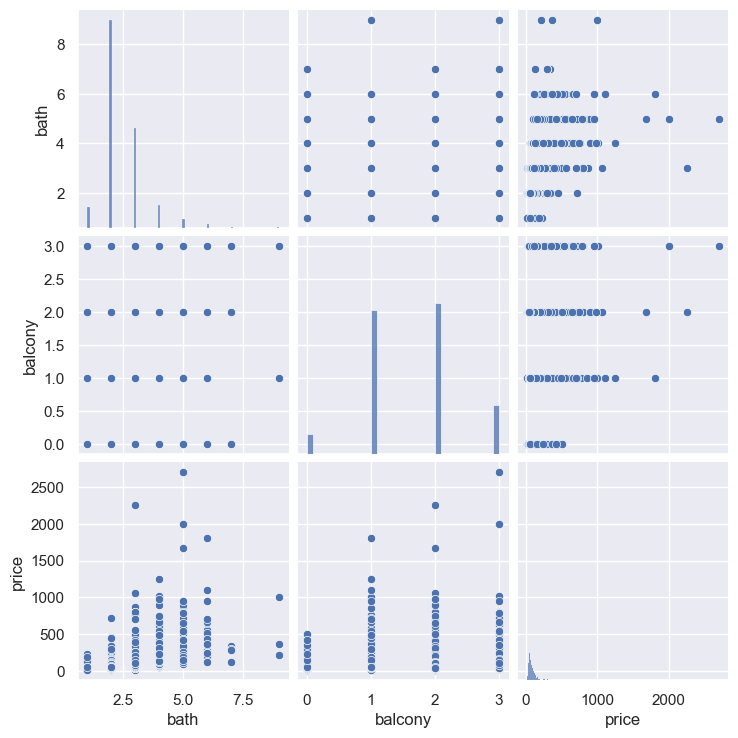

In [8]:
sns.pairplot(data);

In [9]:
data['area_type'].value_counts()

area_type
Super built-up  Area    6017
Built-up  Area          1158
Plot  Area               269
Carpet  Area              52
Name: count, dtype: int64

In [10]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

In [11]:
d1=data

In [12]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7496 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7496 non-null   object 
 1   availability  7496 non-null   object 
 2   location      7496 non-null   object 
 3   size          7496 non-null   object 
 4   society       7496 non-null   object 
 5   total_sqft    7496 non-null   object 
 6   bath          7496 non-null   float64
 7   balcony       7496 non-null   float64
 8   price         7496 non-null   float64
dtypes: float64(3), object(6)
memory usage: 585.6+ KB


In [13]:
d1['bhk']=d1['size'].astype(str).apply(lambda x: x.split(' ')[0])

In [14]:
d1=d1.drop(['size'],axis=1)

In [15]:
d1.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,DuenaTa,1170,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,Prrry M,2785,5.0,3.0,295.00,4


In [16]:
d1=d1.drop(['area_type','availability','society','balcony'],axis=1)

In [17]:
d1=d1.dropna()

In [18]:
d1['total_sqft'].unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [19]:
def numbers(x):
    a=x.split('-')
    if len(a)==2:
        return (float(a[0])+float(a[1]))/2
    try:
        return float(a[0])
    except:
        return None

In [20]:
d2=d1.copy()
d2['total_sqft']=d2['total_sqft'].apply(numbers)


In [21]:
d2.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
3,Lingadheeranahalli,1521.0,3.0,95.00,3
5,Whitefield,1170.0,2.0,38.00,2
11,Whitefield,2785.0,5.0,295.00,4


In [22]:
d2=d2.dropna()

In [23]:
d2.shape

(7481, 5)

In [24]:
d3=d2.copy()
d3['bath']=d3['bath'].apply(lambda x: int(x))
d3['bhk']=d3['bhk'].apply(lambda x: int(x))


In [25]:
d4=d3.copy()
d4['location']=d4['location'].apply(lambda x: x.strip())

In [26]:
a=d4.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [27]:
others=a[a<10]
d4['location']=d4['location'].apply(lambda x: "others" if x in others else x)

In [28]:
d4['location'].value_counts()

location
others                    1330
Whitefield                 397
Sarjapur  Road             310
Electronic City            238
Kanakpura Road             216
                          ... 
Amruthahalli                10
Arekere                     10
Banashankari Stage III      10
Jalahalli East              10
Dairy Circle                10
Name: count, Length: 155, dtype: int64

In [29]:
d4['price_sqft']=d4['price']*100000/d4['total_sqft']

In [30]:
d4.head()

,location,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5,120.00,4,4615.384615
3,Lingadheeranahalli,1521.0,3,95.00,3,6245.890861
5,Whitefield,1170.0,2,38.00,2,3247.863248
11,Whitefield,2785.0,5,295.00,4,10592.459605


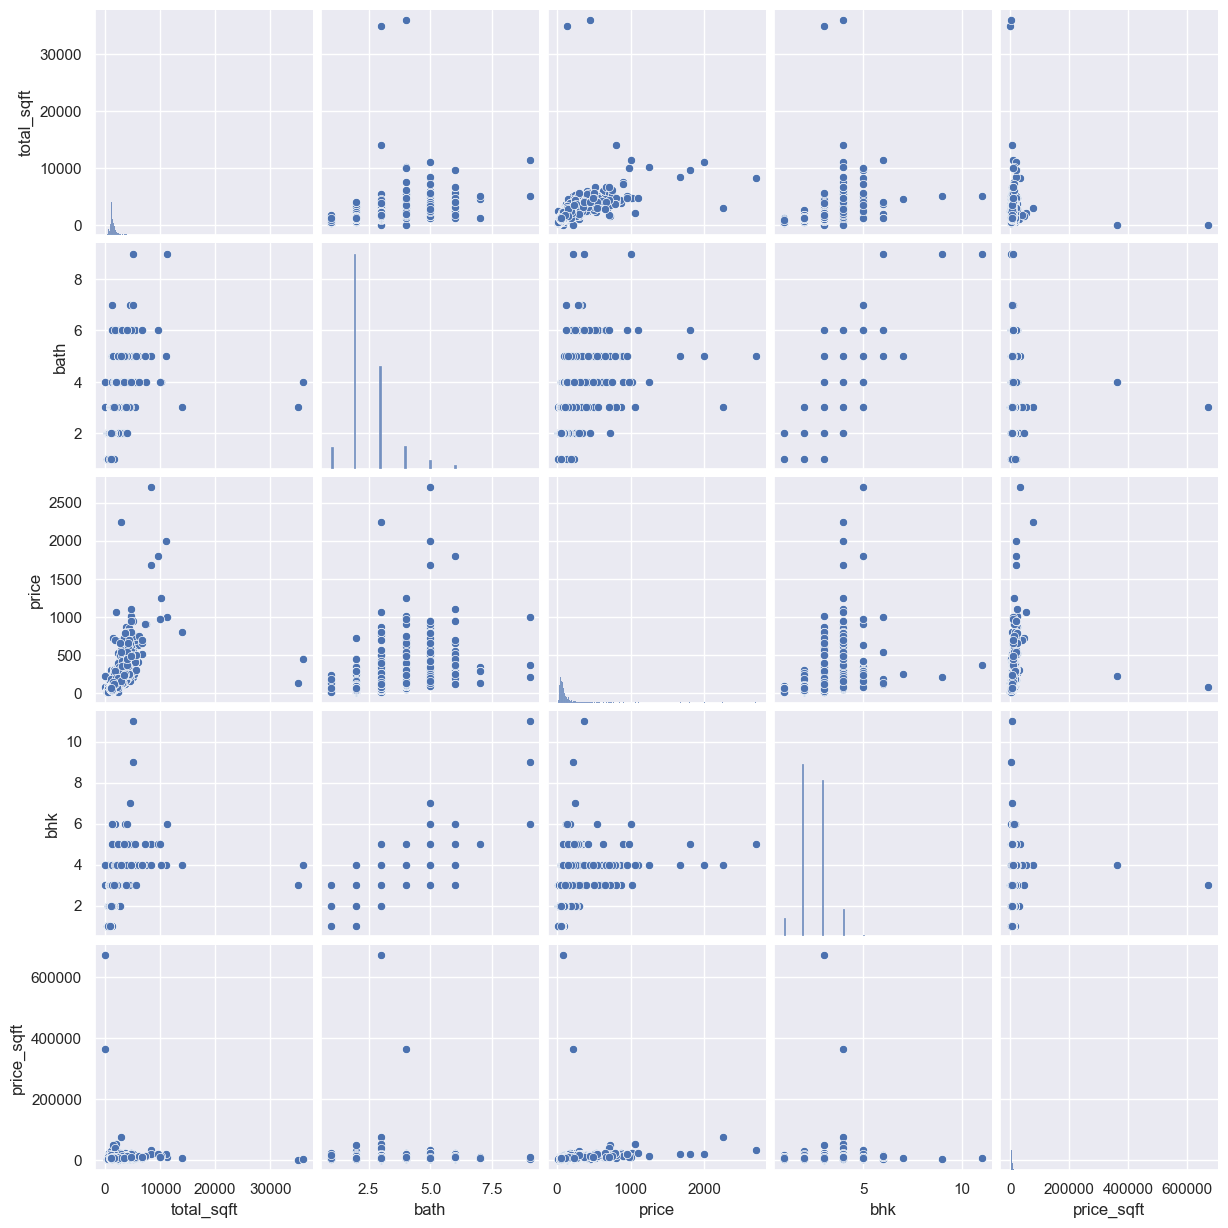

In [194]:
sns.pairplot(d4)

Text(0.5, 1.0, 'price')

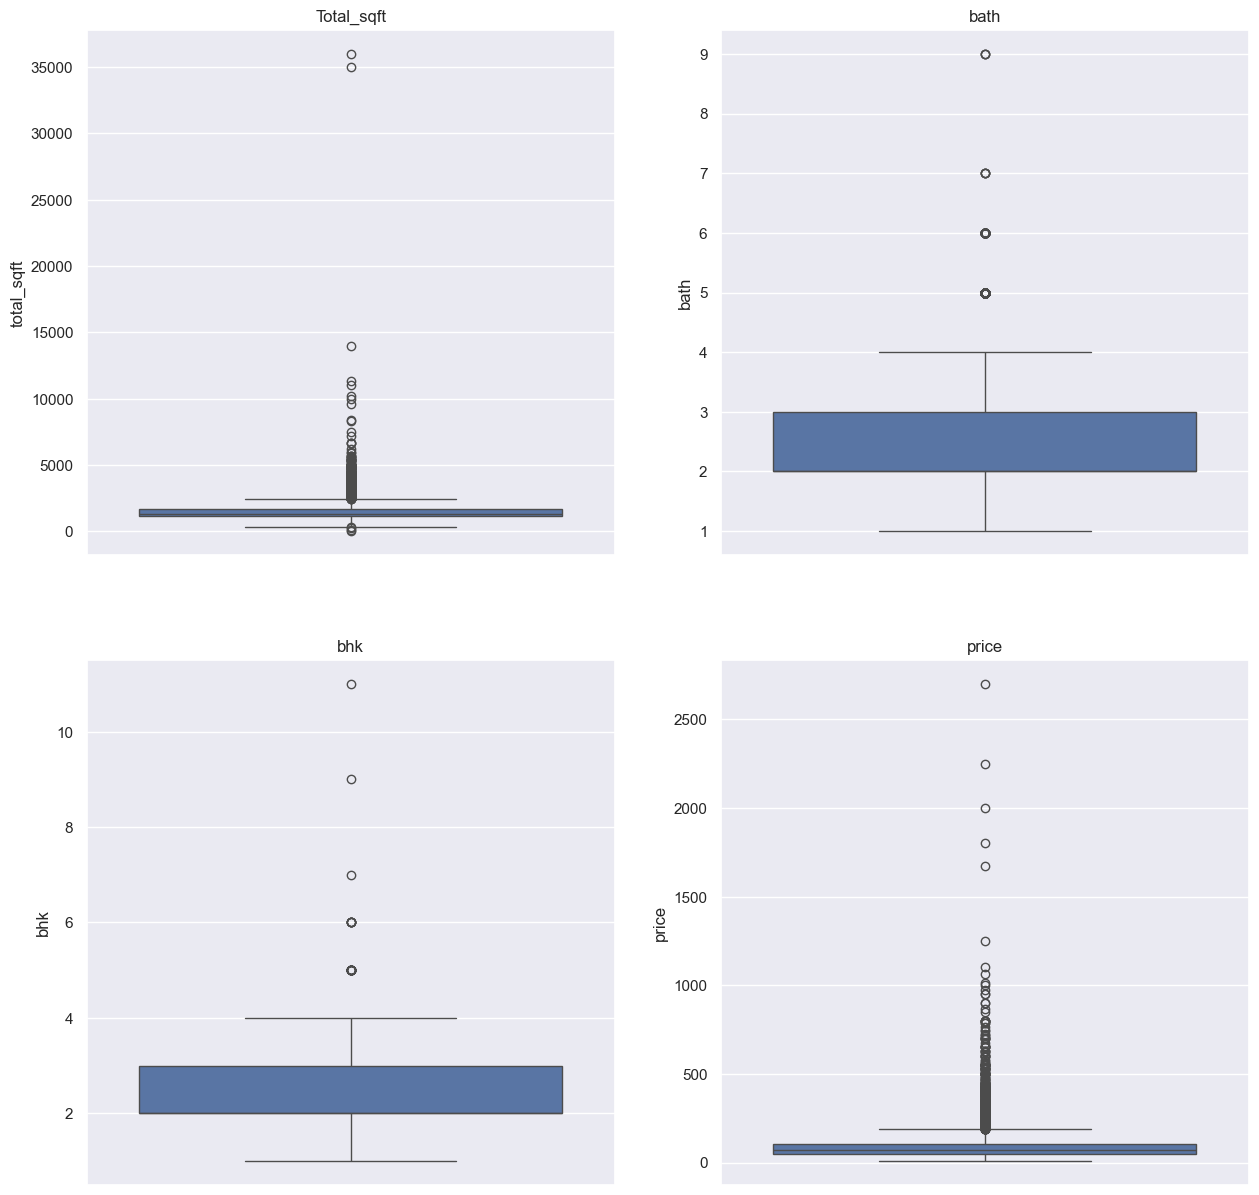

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
sns.boxplot(d4['total_sqft'], ax=axs[0, 0])
axs[0, 0].set_title('Total_sqft')

sns.boxplot(d4['bath'], ax=axs[0, 1])
axs[0, 1].set_title('bath')

sns.boxplot(d4['bhk'], ax=axs[1, 0])
axs[1, 0].set_title('bhk')

sns.boxplot(d4['price'], ax=axs[1, 1])
axs[1, 1].set_title('price')

In [107]:
d4.columns

Index(['location', 'total_sqft', 'bath', 'price', 'bhk', 'price_sqft'], dtype='object')

C:\Users\choco\AppData\Local\Temp\ipykernel_37812\3513438388.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d4['price'])


<Axes: xlabel='price', ylabel='Density'>

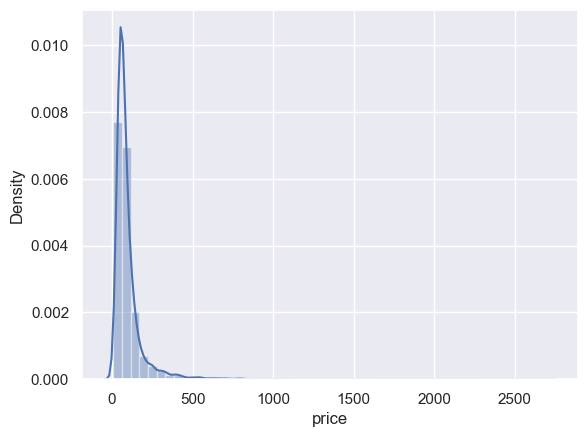

In [197]:
sns.distplot(d4['price'])

In [32]:
d5=d4.copy()
d5=d5[d5['price']<500]

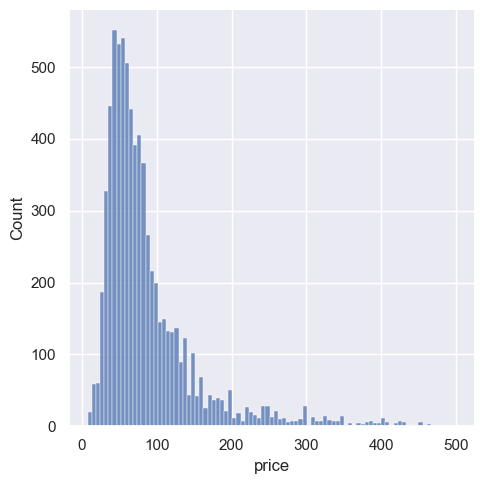

In [33]:
sns.displot(d5['price'])

C:\Users\choco\AppData\Local\Temp\ipykernel_2872\1196113909.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d5['total_sqft'])


<Axes: xlabel='total_sqft', ylabel='Density'>

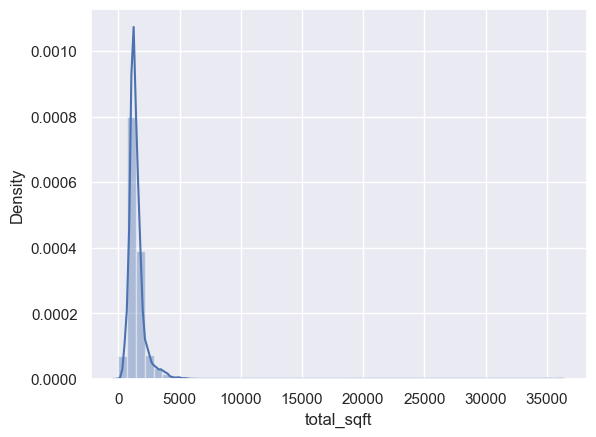

In [35]:
sns.distplot(d5['total_sqft'])

In [36]:
d5=d5[d5['total_sqft']<5100]

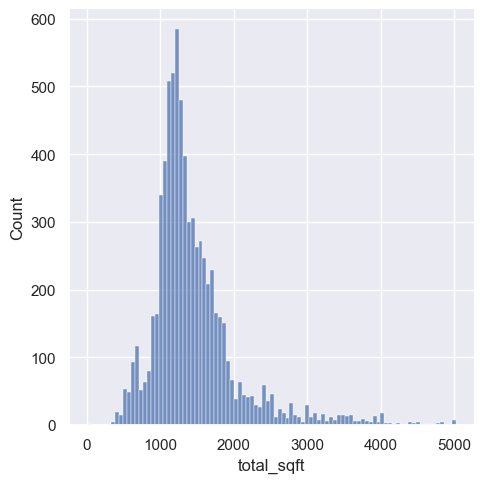

In [37]:
sns.displot(d5['total_sqft'])

(array([3.610e+02, 3.425e+03, 3.105e+03, 4.650e+02, 1.800e+01, 4.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

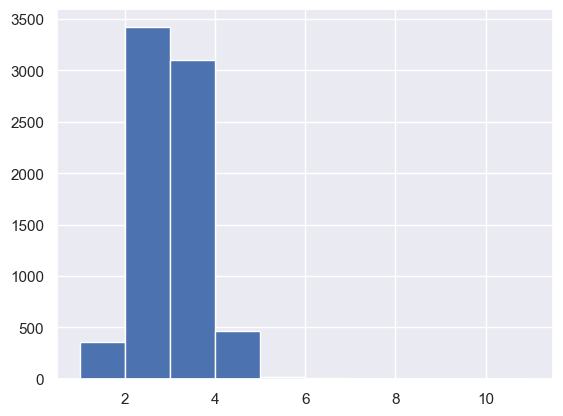

In [39]:
plt.hist(d5['bhk'])

In [40]:
d5.shape

(7381, 6)

In [41]:
df5 = d5[d5.bath<d5.bhk+2]
df5.shape

(7300, 6)

In [42]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_sqft)
        st = np.std(subdf.price_sqft)
        reduced_df = subdf[(subdf.price_sqft>(m-st)) & (subdf.price_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df10 = remove_pps_outliers(df5)
df10.shape

(5805, 6)

In [206]:
d5['bhk'].astype

<bound method NDFrame.astype of 0        2
1        4
3        3
5        2
11       4
        ..
13313    3
13314    3
13315    5
13317    2
13318    4
Name: bhk, Length: 7476, dtype: int64>

In [43]:
d6=df10.copy()
dummies=pd.get_dummies(d6['location'])
d6=pd.concat([d6,dummies],axis='columns')

In [44]:
d6=d6.drop(['location'],axis=1)

In [45]:
d6['price_sqft'].mean()

5568.54247055154

In [210]:
d6

,total_sqft,bath,price,bhk,price_sqft,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,others
0,2825.0,4,250.00,4,8849.557522,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1875.0,3,167.00,3,8906.666667,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1394.0,2,100.00,2,7173.601148,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1077.0,2,93.00,2,8635.097493,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1590.0,3,131.00,3,8238.993711,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,1000.0,2,49.50,2,4950.000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5984,1256.0,2,65.00,2,5175.159236,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5985,1353.0,2,110.00,2,8130.081301,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5986,1440.0,2,63.93,3,4439.583333,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [46]:
d7=d6.copy()
d7=d7.drop(['others'],axis=1)
d7=d7.drop(['price_sqft'],axis=1)

In [47]:
d7

,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4,250.00,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1875.0,3,167.00,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1394.0,2,100.00,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1077.0,2,93.00,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1590.0,3,131.00,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800,1000.0,2,49.50,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5801,1256.0,2,65.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5802,1353.0,2,110.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5803,1440.0,2,63.93,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
x=d7.drop(['price','bath'],axis=1)
y=d7['price']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=0.2)

In [54]:
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [59]:
y_pred=reg.predict(x_test)

In [217]:
len(y_pred.reshape(-1,1))

1198

In [218]:
len(y_test)


1198

In [219]:
x_train.shape

(4790, 156)

In [220]:
x_test.shape

(1198, 156)

In [60]:
y_pred=y_pred.reshape(-1,1)

In [61]:
y_test=y_test.values.reshape(-1,1)

In [62]:
y_test

array([[62.78],
       [84.  ],
       [93.  ],
       ...,
       [33.  ],
       [75.  ],
       [31.37]])

In [63]:
y_test.shape,x_test.shape

((1161, 1), (1161, 156))

In [64]:
reg.score(x_test,y_test)

0.8127874608204588

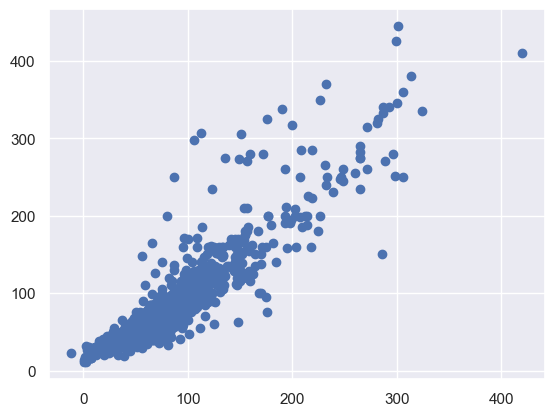

In [65]:
plt.scatter(y_pred,y_test)


In [66]:
reg_knn=KNeighborsRegressor(n_neighbors=20)
reg_knn.fit(x_train,y_train)
y_pred_knn=reg_knn.predict(x_test)

In [67]:
reg_knn.score(x_test,y_test) 

0.7271729950764617

In [60]:
mean_absolute_error(y_pred,y_test)

14.841670179421897

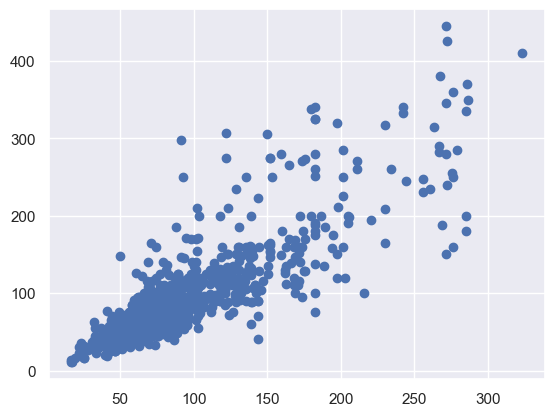

In [61]:
plt.scatter(y_pred_knn,y_test)

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
reg_dt=RandomForestRegressor(n_estimators=100)
reg_dt.fit(x_train,y_train)
y_pred_dt=reg_dt.predict(x_test)

In [69]:
reg_dt.score(x_test,y_test) 

0.7856279937799646

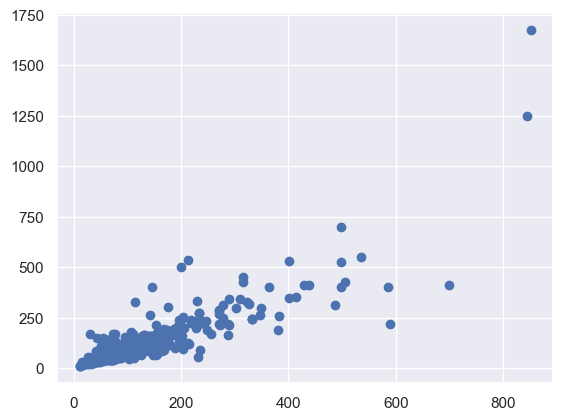

In [230]:
plt.scatter(y_pred_dt,y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,make_scorer
r2_scorer = make_scorer(r2_score)
scores = cross_val_score(reg_dt, x, y, cv=20, scoring=r2_scorer)


In [70]:
from sklearn.ensemble import BaggingRegressor
bag_reg=BaggingRegressor(estimator=LinearRegression(),n_estimators=100,max_samples=2,oob_score=True,random_state=0)
bag_reg.fit(x_train,y_train)
bag_reg.oob_score_


0.5408657325238275

In [73]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500]
}

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
xg=GradientBoostingRegressor(loss="squared_error",n_estimators=500)
xg.fit(x_train,y_train)
xg.score(x_test,y_test)

0.8236045309288205

In [ ]:
from sklearn.model_selection import GridSearchCV
CV=GridSearchCV(estimator=xg,cv=5,param_grid=param_grid)
CV.fit(x_train,y_train)

In [140]:
CV.best_params_

{'n_estimators': 500}

In [62]:
y_hat=xg.predict(x_test)

In [63]:
y_hat.shape

(1161,)

In [64]:
x_test.shape

(1161, 157)

In [65]:
y_hat=y_hat.reshape(-1,1)

In [66]:
y_hat.shape

(1161, 1)

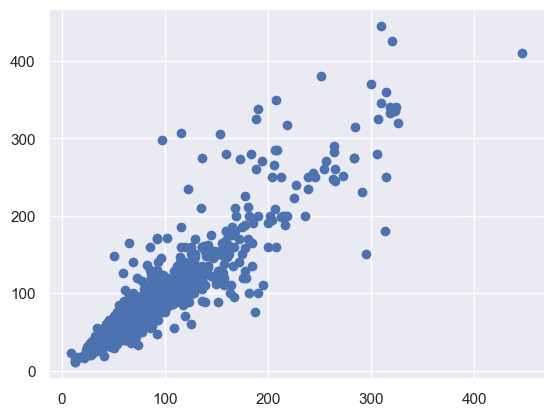

In [113]:
plt.scatter(y_hat,y_test)

In [840]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    x1 = np.zeros(len(x.columns))
    x1[0] = sqft
    x1[1] = bath
    x1[2] = bhk
    if loc_index >= 0:
        x1[loc_index] = 1

    return reg.predict(x1.reshape(-1,157))[0]

In [841]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\Users\choco\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.08783309490246

In [842]:
predict_price('1st Phase JP Nagar',1000, 3, 3)



c:\Users\choco\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.85430844574842

In [843]:
predict_price('Indira Nagar',1000, 3, 3)


c:\Users\choco\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.35424873262288

In [116]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(xg,f)

In [117]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [75]:
cat_data=df10.copy()
cat_data

,location,total_sqft,bath,price,bhk,price_sqft
0,1st Phase JP Nagar,2825.0,4,250.00,4,8849.557522
1,1st Phase JP Nagar,1875.0,3,167.00,3,8906.666667
2,1st Phase JP Nagar,1394.0,2,100.00,2,7173.601148
3,1st Phase JP Nagar,1077.0,2,93.00,2,8635.097493
4,1st Phase JP Nagar,1590.0,3,131.00,3,8238.993711
...,...,...,...,...,...,...
5800,others,1000.0,2,49.50,2,4950.000000
5801,others,1256.0,2,65.00,2,5175.159236
5802,others,1353.0,2,110.00,2,8130.081301
5803,others,1440.0,2,63.93,3,4439.583333


In [76]:
cat_data=cat_data.drop(['price_sqft'],axis=1)

In [77]:
cat_data

,location,total_sqft,bath,price,bhk
0,1st Phase JP Nagar,2825.0,4,250.00,4
1,1st Phase JP Nagar,1875.0,3,167.00,3
2,1st Phase JP Nagar,1394.0,2,100.00,2
3,1st Phase JP Nagar,1077.0,2,93.00,2
4,1st Phase JP Nagar,1590.0,3,131.00,3
...,...,...,...,...,...
5800,others,1000.0,2,49.50,2
5801,others,1256.0,2,65.00,2
5802,others,1353.0,2,110.00,2
5803,others,1440.0,2,63.93,3


In [80]:
cat_x=cat_data.drop(['price','bath'],axis=1)
cat_y=cat_data['price']

In [81]:
cat_xtrain,cat_xtest,cat_ytrain,xat_ytest=train_test_split(cat_x,cat_y,random_state=23,test_size=0.2)

In [82]:
from catboost import CatBoostRegressor
cat_model=CatBoostRegressor(learning_rate=0.05)
cat_model.fit(x_train,y_train)

0:	learn: 53.8546486	total: 157ms	remaining: 2m 36s
1:	learn: 52.2005924	total: 159ms	remaining: 1m 19s
2:	learn: 50.6753307	total: 163ms	remaining: 54.3s
3:	learn: 49.1711800	total: 167ms	remaining: 41.5s
4:	learn: 47.7504707	total: 171ms	remaining: 34.1s
5:	learn: 46.4743266	total: 174ms	remaining: 28.8s
6:	learn: 45.2353450	total: 178ms	remaining: 25.2s
7:	learn: 44.0627614	total: 181ms	remaining: 22.4s
8:	learn: 42.9663578	total: 185ms	remaining: 20.4s
9:	learn: 41.9167164	total: 189ms	remaining: 18.7s
10:	learn: 40.9614294	total: 192ms	remaining: 17.2s
11:	learn: 40.1166010	total: 195ms	remaining: 16.1s
12:	learn: 39.2663496	total: 198ms	remaining: 15s
13:	learn: 38.4859339	total: 202ms	remaining: 14.2s
14:	learn: 37.7713207	total: 205ms	remaining: 13.5s
15:	learn: 37.0923206	total: 210ms	remaining: 12.9s
16:	learn: 36.5228510	total: 212ms	remaining: 12.2s
17:	learn: 35.9374694	total: 216ms	remaining: 11.8s
18:	learn: 35.3896956	total: 220ms	remaining: 11.3s
19:	learn: 34.8866206	

In [83]:
cat_model.score(x_test,y_test)

0.8347092683151283

In [251]:
n=cat_model.predict(np.array(x_test)[0])
n

45.407030723120414

In [252]:
m=xg.predict(np.array(x_test)[0].reshape(-1,157))
m

c:\Users\choco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([46.08602527])

In [250]:
(n+m)/2

array([45.746528])